In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from radial_viz import RadialVisualization

In [2]:
iris_dataset = datasets.load_iris()
X_iris = iris_dataset.data
Y_iris = iris_dataset.target

breath_cancer_dataset = datasets.load_breast_cancer()
X_breath_cancer = breath_cancer_dataset.data
Y_breath_cancer = breath_cancer_dataset.target

# Kmeans vs Kmeans++

In [3]:
from your_kmeans import *
from your_k_medoids import *


## kmeans

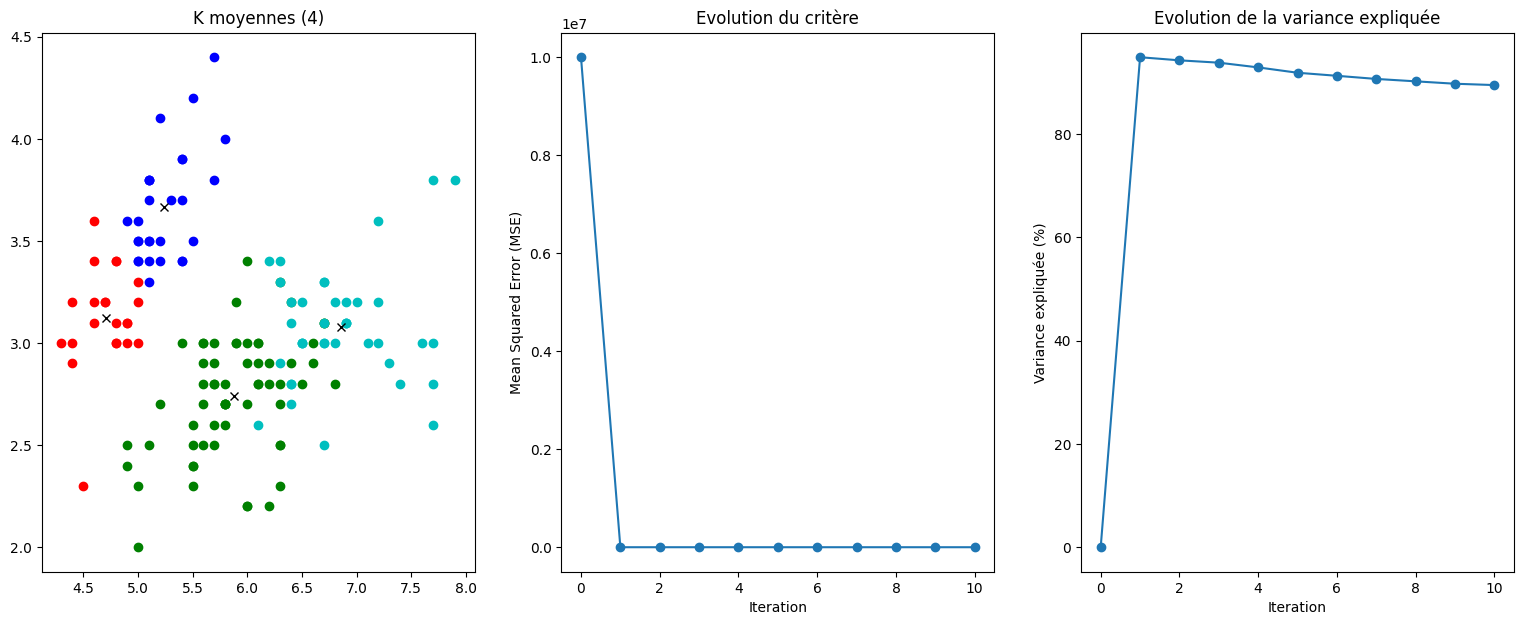

Nombre d'itérations : 11


In [4]:
clusters, targets, mse, explained_std=my_kmeans(X_iris, 4, Visualisation=True, Seuil=0.001)


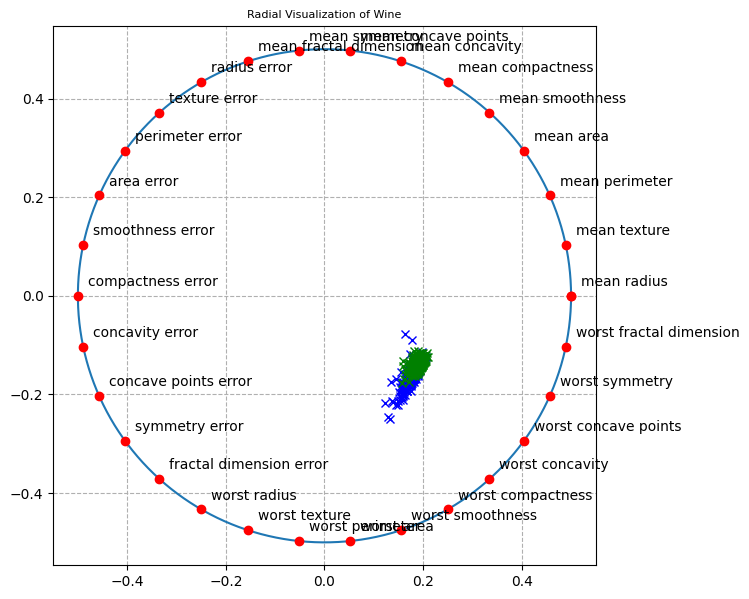

In [4]:
RadialVisualization(breath_cancer_dataset.data,breath_cancer_dataset.target,breath_cancer_dataset.target_names,
    breath_cancer_dataset.feature_names, "Wine",r=0.5)


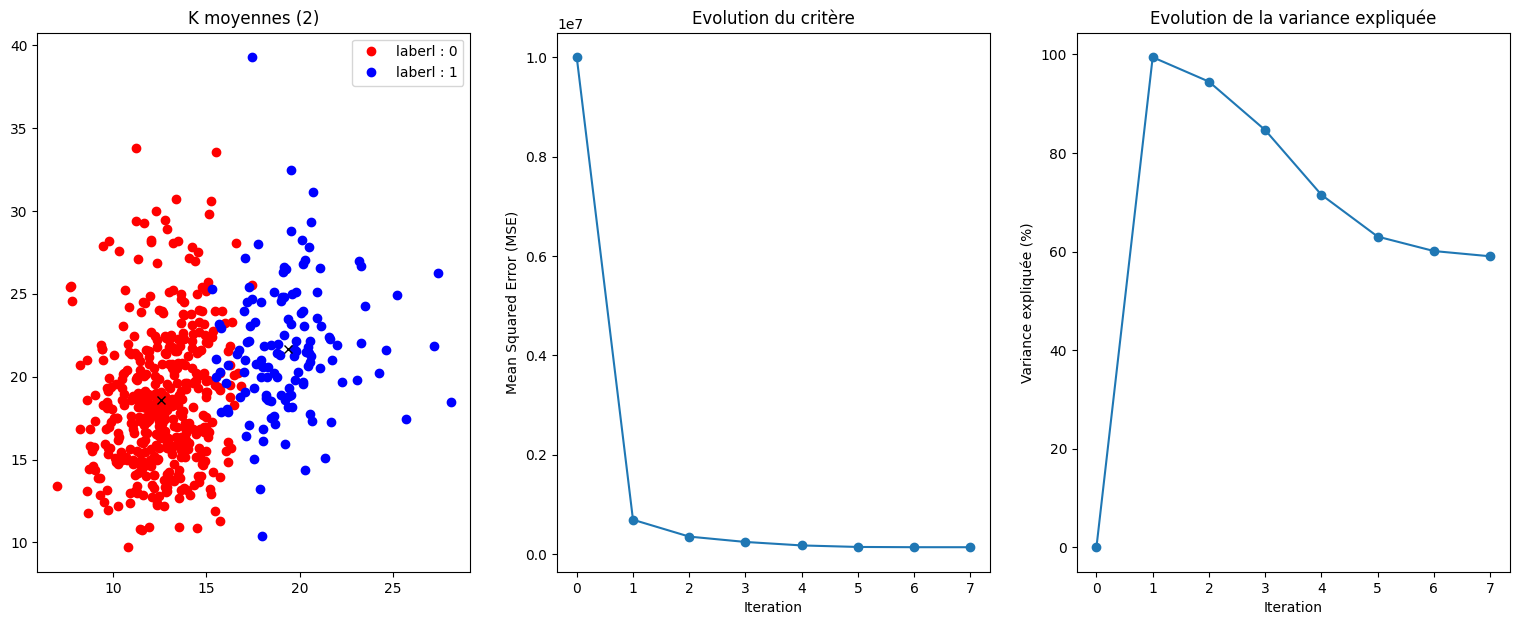

Nombre d'itérations : 8


In [7]:
clusters, targets, mse, explained_std=my_kmeans(X_breath_cancer, 2, Visualisation=True, Seuil=0.001)



Nombre d'itérations : 9
Nombre d'itérations : 11
Nombre d'itérations : 16
Nombre d'itérations : 6
Nombre d'itérations : 6
Nombre d'itérations : 5
Nombre d'itérations : 9


Text(0.5, 1.0, 'Variance expliquée')

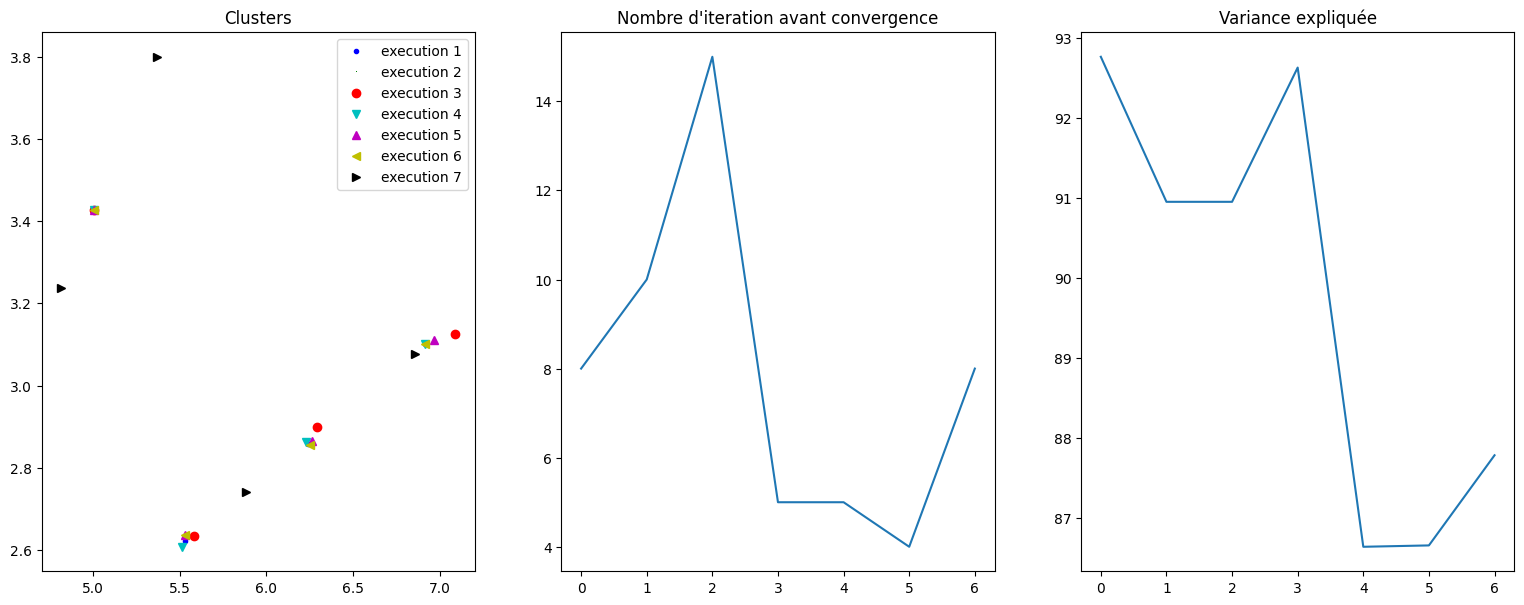

In [22]:
## visualisation de la stablité apres plusiers essais
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
markers = [".",",","o","v","^","<",">"]
results = [
    my_kmeans(X_iris, 4, Visualisation=False, Seuil=0.001) for _ in range(7)
]

results = [ [result[0], len(result[2]), result[3][-1]] for result in results]

plt.subplots(1, 3, figsize=(19, 7))

plt.subplot(1, 3, 1)
clusters = [result[0] for result in results]

for i, C in enumerate(clusters):
    plt.plot(C[0, :], C[1, :], markers[i], color=colors[i], label=f'execution {i+1}')
    plt.title('Clusters')
plt.legend()

plt.subplot(1, 3, 2)
taille = [result[1] for result in results]
plt.plot(taille)
plt.title("Nombre d'iteration avant convergence")

plt.subplot(1, 3, 3)
mse = [result[2] for result in results]
plt.plot(mse)
plt.title('Variance expliquée')

Nombre d'itérations : 6
Nombre d'itérations : 5
Nombre d'itérations : 7
Nombre d'itérations : 6
Nombre d'itérations : 7
Nombre d'itérations : 5
Nombre d'itérations : 3


Text(0.5, 1.0, 'Variance expliquée')

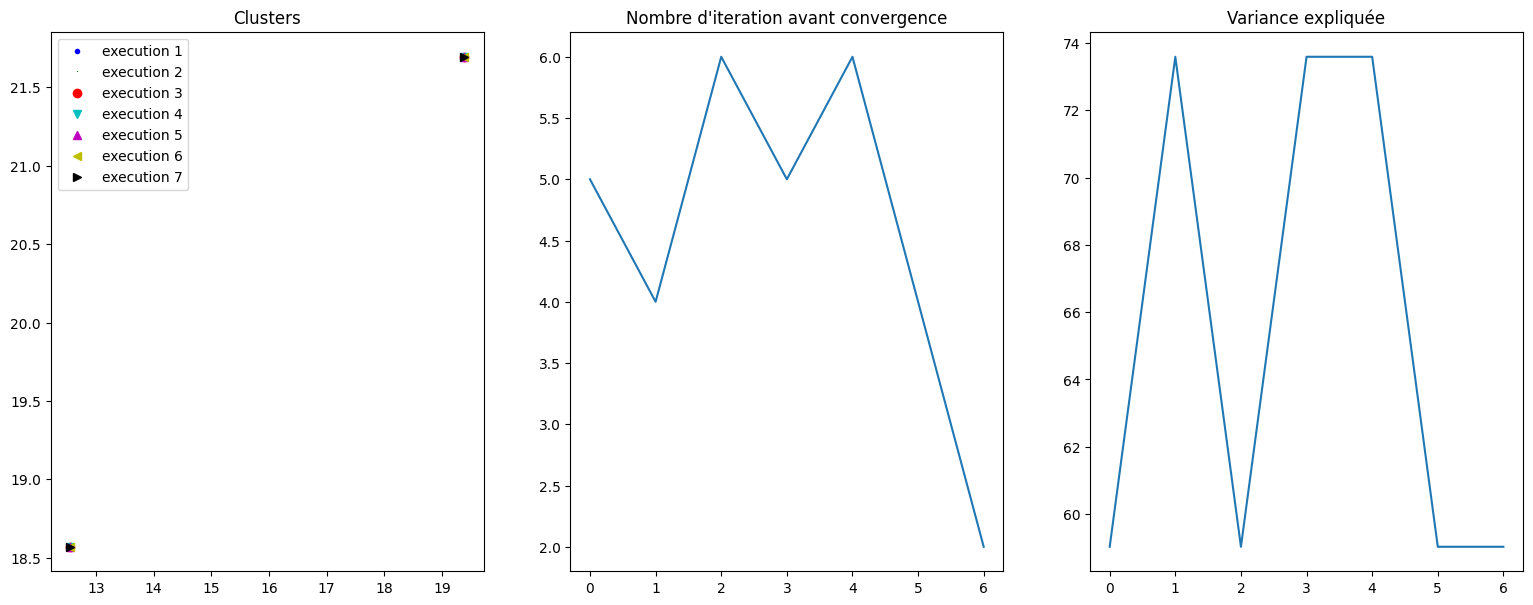

In [24]:
## visualisation de la stablité apres plusiers essais
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
markers = [".",",","o","v","^","<",">"]
results = [
    my_kmeans(X_breath_cancer, 2, Visualisation=False, Seuil=0.001) for _ in range(7)
]

results = [ [result[0], len(result[2]), result[3][-1]] for result in results]

plt.subplots(1, 3, figsize=(19, 7))

plt.subplot(1, 3, 1)
clusters = [result[0] for result in results]

for i, C in enumerate(clusters):
    plt.plot(C[0, :], C[1, :], markers[i], color=colors[i], label=f'execution {i+1}')
    plt.title('Clusters')
plt.legend()

plt.subplot(1, 3, 2)
taille = [result[1] for result in results]
plt.plot(taille)
plt.title("Nombre d'iteration avant convergence")

plt.subplot(1, 3, 3)
mse = [result[2] for result in results]
plt.plot(mse)
plt.title('Variance expliquée')

## kmeans++ 

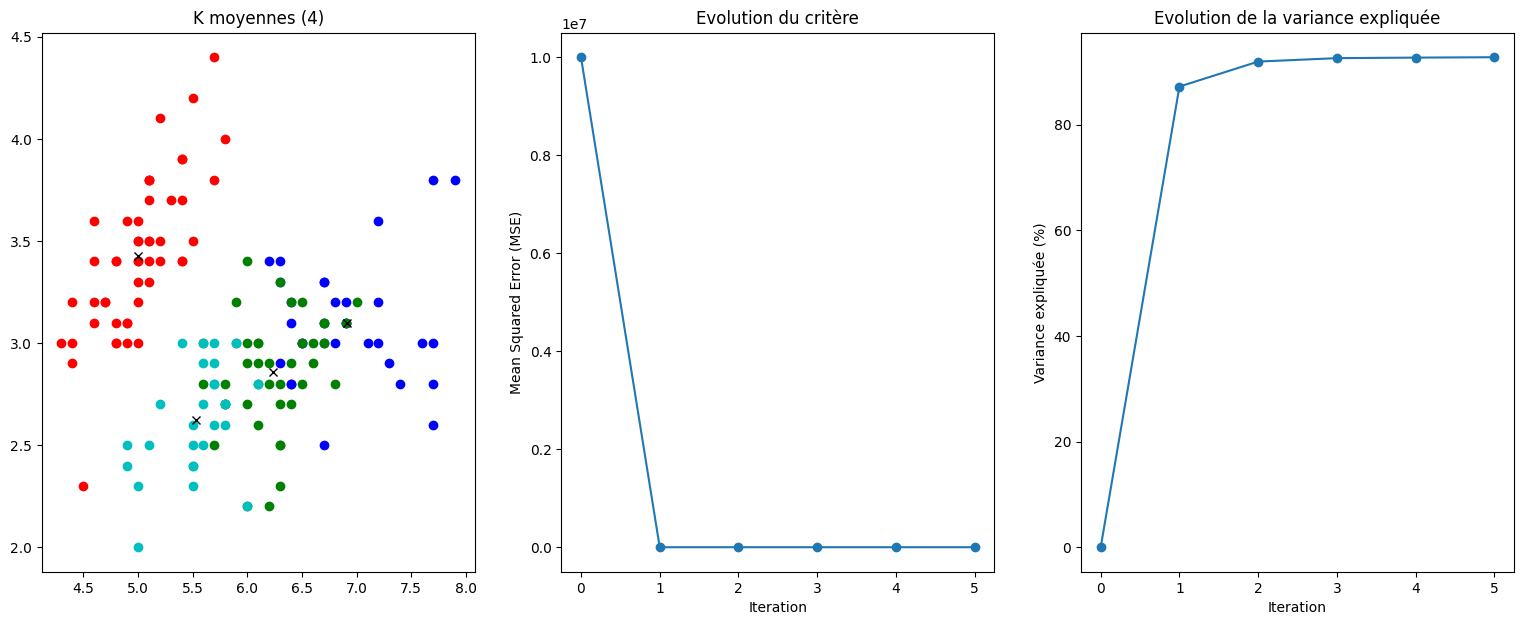

Nombre d'itérations : 6


In [5]:
clusters, targets, mse, explained_std=my_kmeans(X_iris, 4, Visualisation=True, Seuil=0.001)


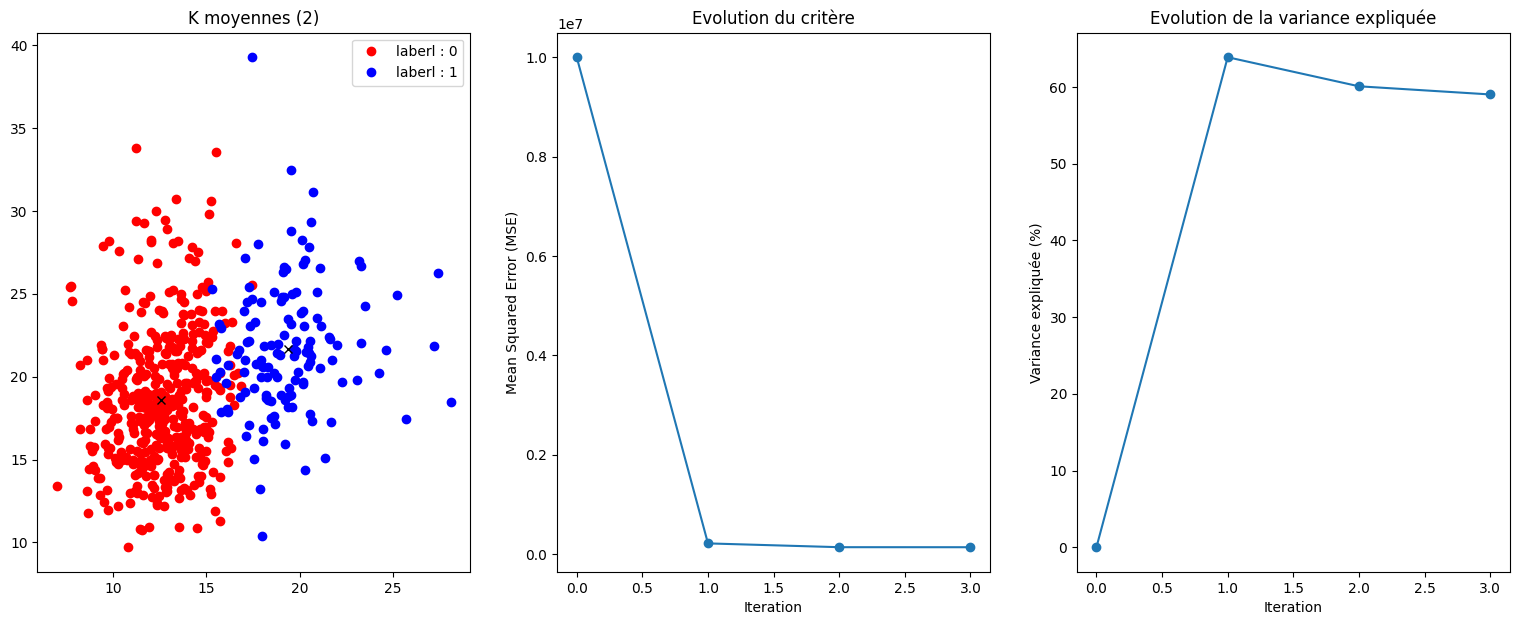

Nombre d'itérations : 4


In [10]:
clusters, targets, mse, explained_std=my_kmeans(X_breath_cancer, 2, Visualisation=True, Seuil=0.001, kpp=True)

Nombre d'itérations : 3
Nombre d'itérations : 4
Nombre d'itérations : 3
Nombre d'itérations : 7
Nombre d'itérations : 8
Nombre d'itérations : 6
Nombre d'itérations : 5


Text(0.5, 1.0, 'Variance expliquée')

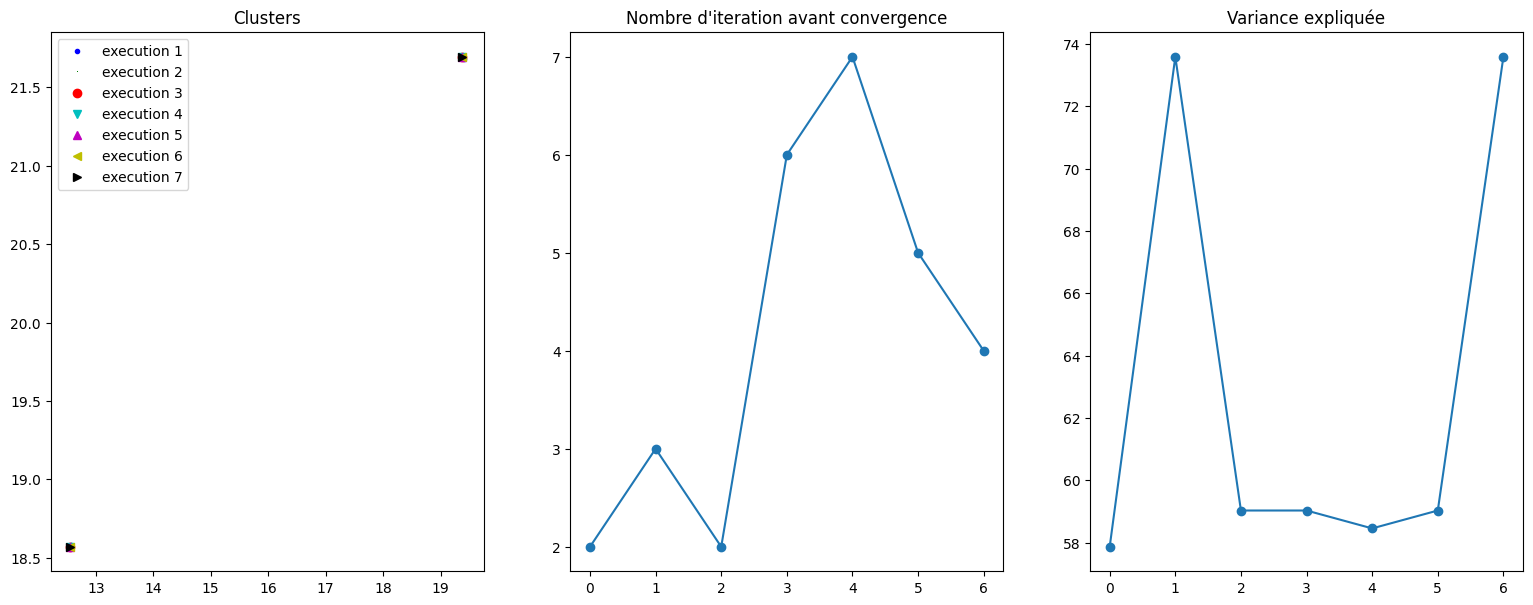

In [25]:
## visualisation de la stablité apres plusiers essais
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
markers = [".",",","o","v","^","<",">"]
results = [
    my_kmeans(X_breath_cancer, 2, Visualisation=False, Seuil=0.001, kpp=True) for _ in range(7)
]

results = [ [result[0], len(result[2]), result[3][-1]] for result in results]

plt.subplots(1, 3, figsize=(19, 7))

plt.subplot(1, 3, 1)
clusters = [result[0] for result in results]

for i, C in enumerate(clusters):
    plt.plot(C[0, :], C[1, :], markers[i], color=colors[i], label=f'execution {i+1}')
    plt.title('Clusters')
plt.legend()

plt.subplot(1, 3, 2)
taille = [result[1] for result in results]
plt.plot(taille, "o-")
plt.title("Nombre d'iteration avant convergence")

plt.subplot(1, 3, 3)
mse = [result[2] for result in results]
plt.plot(mse, "o-")
plt.title('Variance expliquée')

## impact du nombre de cluster

### kmeans on iris

/Users/talibe/Desktop/licence 3 rouen/S5/Data Analysis/TP analyse et visualisation des donnees/M1 SD/TP-2-Clustering etudiant/your_kmeans.py:123: RuntimeWarning: invalid value encountered in scalar divide
  variance_explained[iteration] =  100*(1-(Iw/It))


Nombre d'itérations : 3
Nombre d'itérations : 6
Nombre d'itérations : 5
Nombre d'itérations : 4
Nombre d'itérations : 12
Nombre d'itérations : 6
Nombre d'itérations : 10
Nombre d'itérations : 7
Nombre d'itérations : 6
Nombre d'itérations : 11
Nombre d'itérations : 12
Nombre d'itérations : 6
Nombre d'itérations : 8
Nombre d'itérations : 10


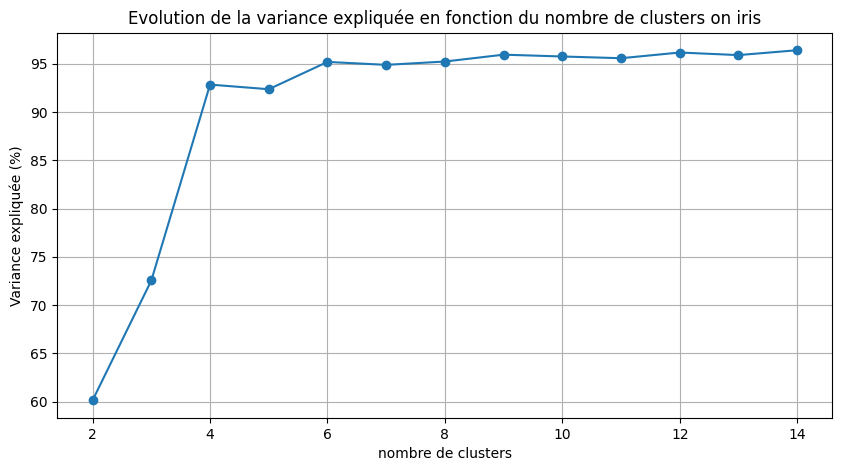

In [12]:
K = np.arange(1, 15)

explained_stds = np.array([my_kmeans(X_iris, k, Visualisation=False, Seuil=0.001)[3][-1] for k in K])

plt.figure(figsize=(10, 5))
plt.plot(K, explained_stds, 'o-')
plt.xlabel('nombre de clusters')
plt.ylabel('Variance expliquée (%)')
plt.title('Evolution de la variance expliquée en fonction du nombre de clusters on iris')
plt.grid()
plt.show()

### kmeans++ on iris

Nombre d'itérations : 3
Nombre d'itérations : 7
Nombre d'itérations : 7
Nombre d'itérations : 4
Nombre d'itérations : 10
Nombre d'itérations : 5
Nombre d'itérations : 5
Nombre d'itérations : 9
Nombre d'itérations : 7
Nombre d'itérations : 10
Nombre d'itérations : 8
Nombre d'itérations : 10
Nombre d'itérations : 8
Nombre d'itérations : 7


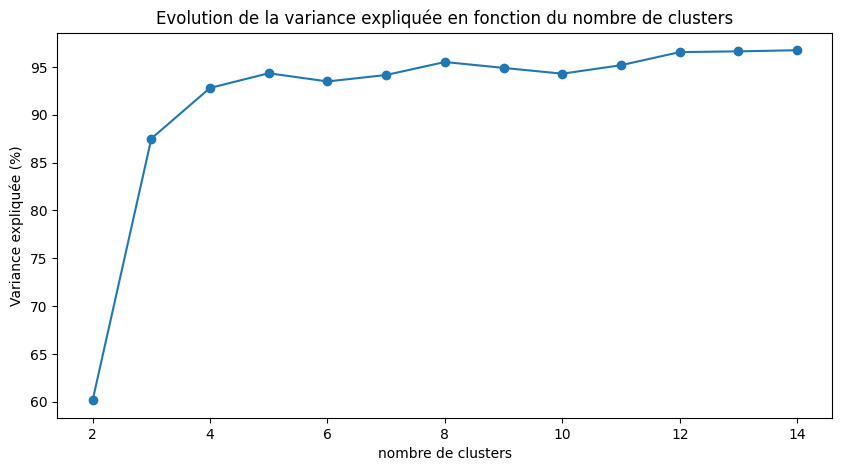

In [7]:
K = np.arange(1, 15)

explained_stds = np.array([my_kmeans(X_iris, k, Visualisation=False, Seuil=0.001, kpp=True)[3][-1] for k in K])

plt.figure(figsize=(10, 5))
plt.plot(K, explained_stds, 'o-')
plt.xlabel('nombre de clusters')
plt.ylabel('Variance expliquée (%)')
plt.title('Evolution de la variance expliquée en fonction du nombre de clusters sur iris avec KPP')
plt.show()

### kmeans on breath cancer

/Users/talibe/Desktop/licence 3 rouen/S5/Data Analysis/TP analyse et visualisation des donnees/M1 SD/TP-2-Clustering etudiant/your_kmeans.py:123: RuntimeWarning: invalid value encountered in scalar divide
  variance_explained[iteration] =  100*(1-(Iw/It))


Nombre d'itérations : 3
Nombre d'itérations : 6
Nombre d'itérations : 15
Nombre d'itérations : 6
Nombre d'itérations : 34
Nombre d'itérations : 23
Nombre d'itérations : 21
Nombre d'itérations : 63
Nombre d'itérations : 19
Nombre d'itérations : 40
Nombre d'itérations : 22
Nombre d'itérations : 14
Nombre d'itérations : 23
Nombre d'itérations : 17


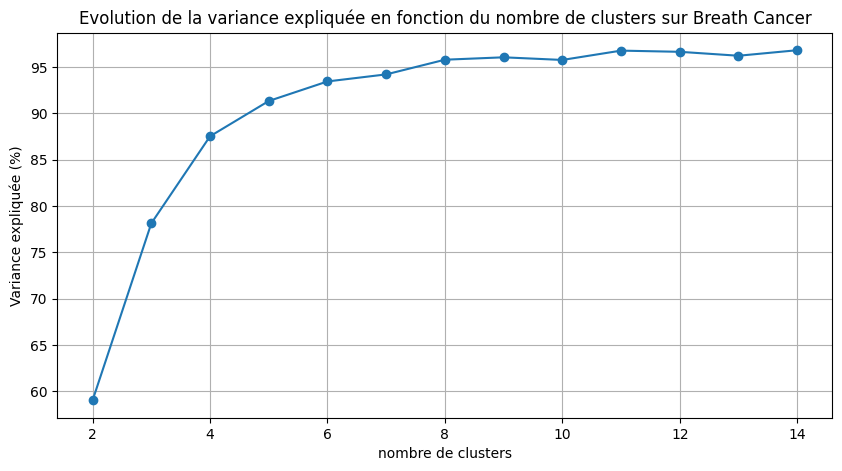

In [13]:
K = np.arange(1, 15)

explained_stds = np.array([my_kmeans(X_breath_cancer, k, Visualisation=False, Seuil=0.001)[3][-1] for k in K])

plt.figure(figsize=(10, 5))
plt.plot(K, explained_stds, 'o-')
plt.xlabel('nombre de clusters')
plt.ylabel('Variance expliquée (%)')
plt.title('Evolution de la variance expliquée en fonction du nombre de clusters sur Breath Cancer')
plt.grid()
plt.show()

### kmeans++ on breath cancer

/Users/talibe/Desktop/licence 3 rouen/S5/Data Analysis/TP analyse et visualisation des donnees/M1 SD/TP-2-Clustering etudiant/your_kmeans.py:123: RuntimeWarning: invalid value encountered in scalar divide
  variance_explained[iteration] =  100*(1-(Iw/It))


Nombre d'itérations : 3
Nombre d'itérations : 4
Nombre d'itérations : 6
Nombre d'itérations : 15
Nombre d'itérations : 9
Nombre d'itérations : 5
Nombre d'itérations : 9
Nombre d'itérations : 12
Nombre d'itérations : 15
Nombre d'itérations : 9
Nombre d'itérations : 4
Nombre d'itérations : 11
Nombre d'itérations : 8
Nombre d'itérations : 31


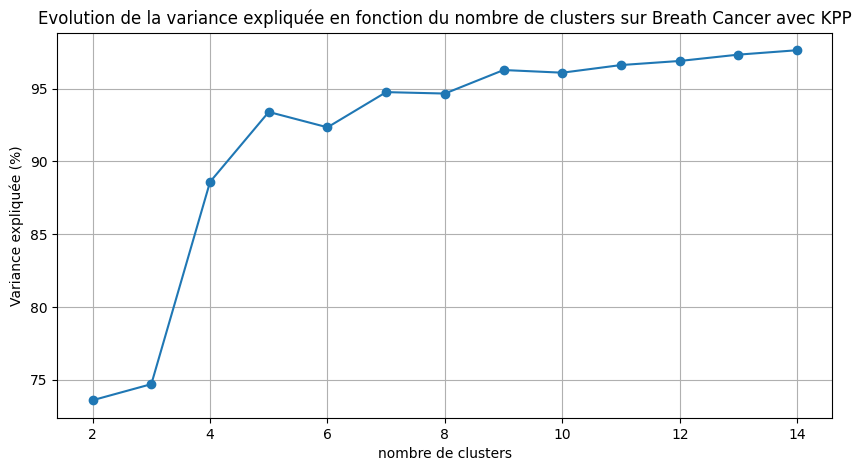

In [14]:
K = np.arange(1, 15)

explained_stds = np.array([my_kmeans(X_breath_cancer, k, Visualisation=False, Seuil=0.001, kpp=True)[3][-1] for k in K])

plt.figure(figsize=(10, 5))
plt.plot(K, explained_stds, 'o-')
plt.xlabel('nombre de clusters')
plt.ylabel('Variance expliquée (%)')
plt.title('Evolution de la variance expliquée en fonction du nombre de clusters sur Breath Cancer avec KPP')
plt.grid()
plt.show()

# kmedoids

Iteration : 1
Iteration : 2
Iteration : 3
Iteration : 4
Iteration : 5


/Users/talibe/Desktop/licence 3 rouen/S5/Data Analysis/TP analyse et visualisation des donnees/M1 SD/TP-2-Clustering etudiant/your_k_medoids.py:66: RuntimeWarning: divide by zero encountered in scalar divide
  if abs(J[iteration-1]-J[iteration])/J[iteration-1] < Seuil:


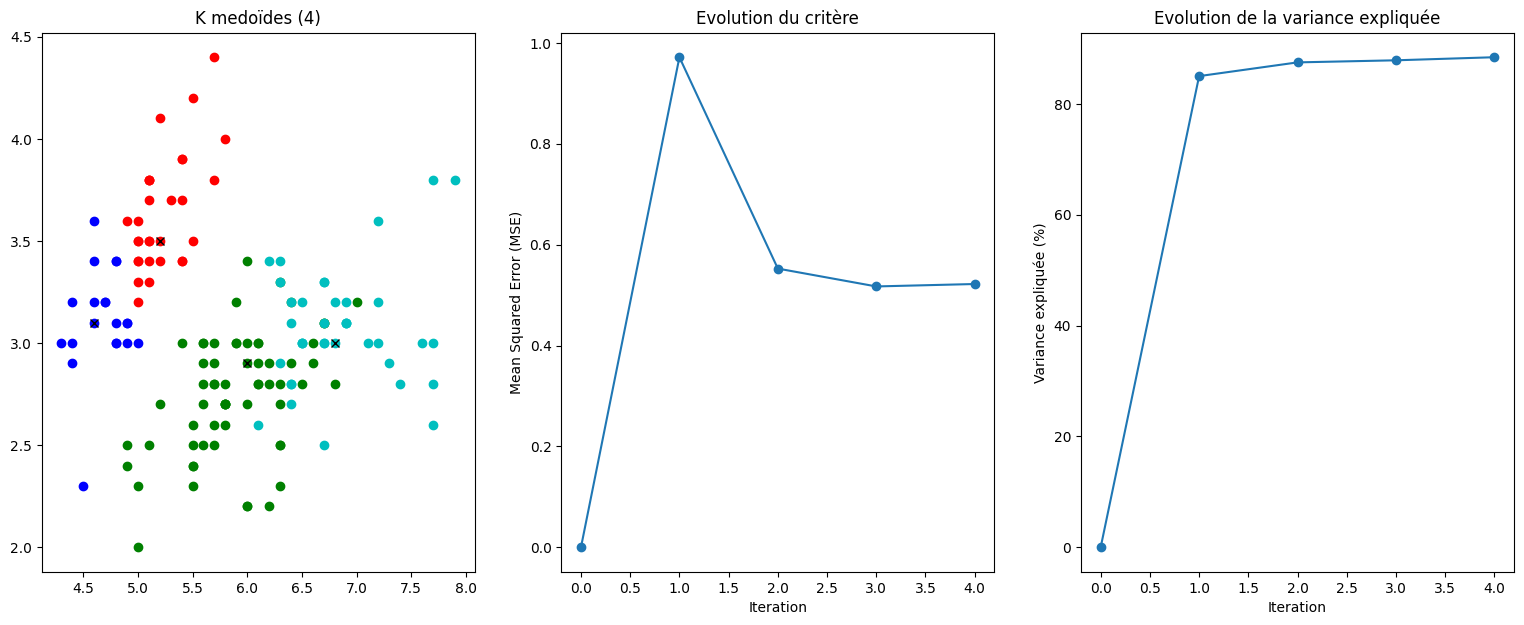

In [15]:
clusters, targets, mse, explained_std=my_kmedoides(X_iris, 4, Visualisation=True, Seuil=0.001)


/Users/talibe/Desktop/licence 3 rouen/S5/Data Analysis/TP analyse et visualisation des donnees/M1 SD/TP-2-Clustering etudiant/your_k_medoids.py:71: RuntimeWarning: divide by zero encountered in scalar divide
  if abs(J[iteration-1]-J[iteration])/J[iteration-1] < Seuil:


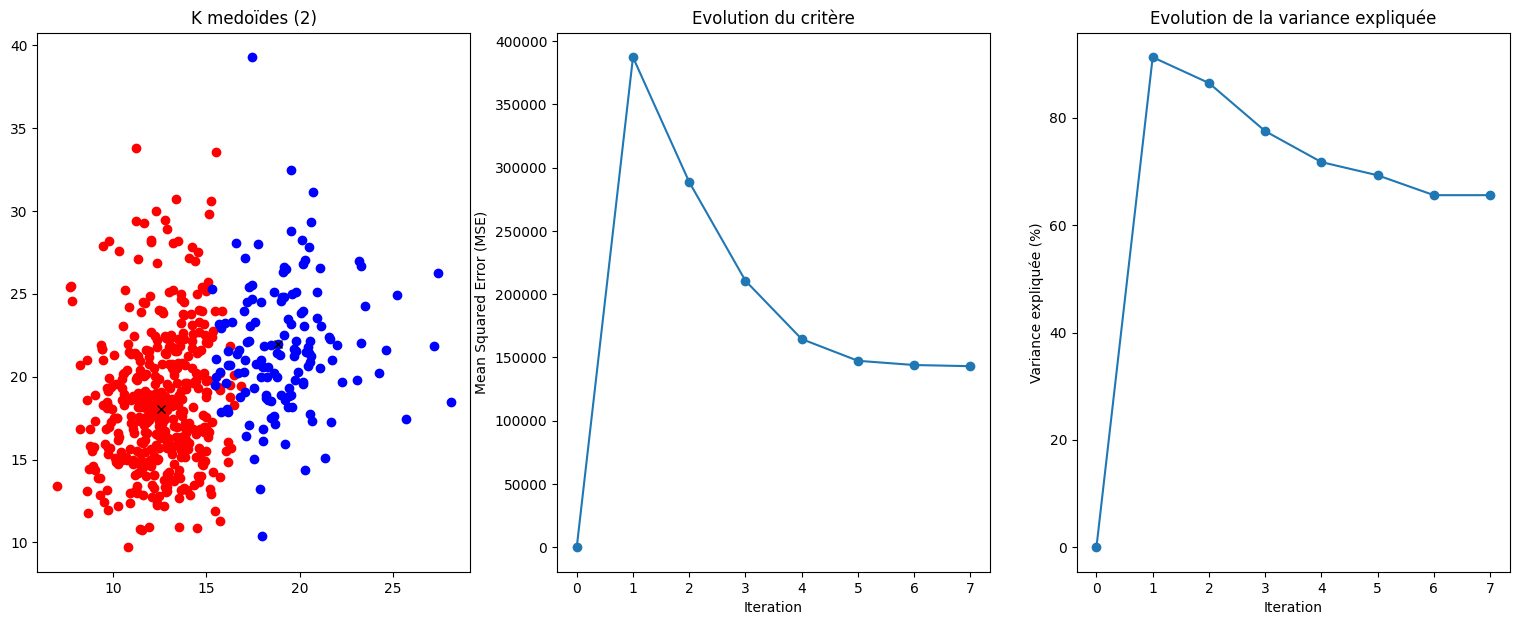

In [4]:
clusters, targets, mse, explained_std=my_kmedoides(X_breath_cancer, 2, Visualisation=True, Seuil=0.001)



In [14]:
import matplotlib.colors as mcolors
list(mcolors.TABLEAU_COLORS.values())

['#1f77b4',
 '#ff7f0e',
 '#2ca02c',
 '#d62728',
 '#9467bd',
 '#8c564b',
 '#e377c2',
 '#7f7f7f',
 '#bcbd22',
 '#17becf']

Text(0.5, 1.0, 'Variance expliquée : moyenne : 65.26035952115512')

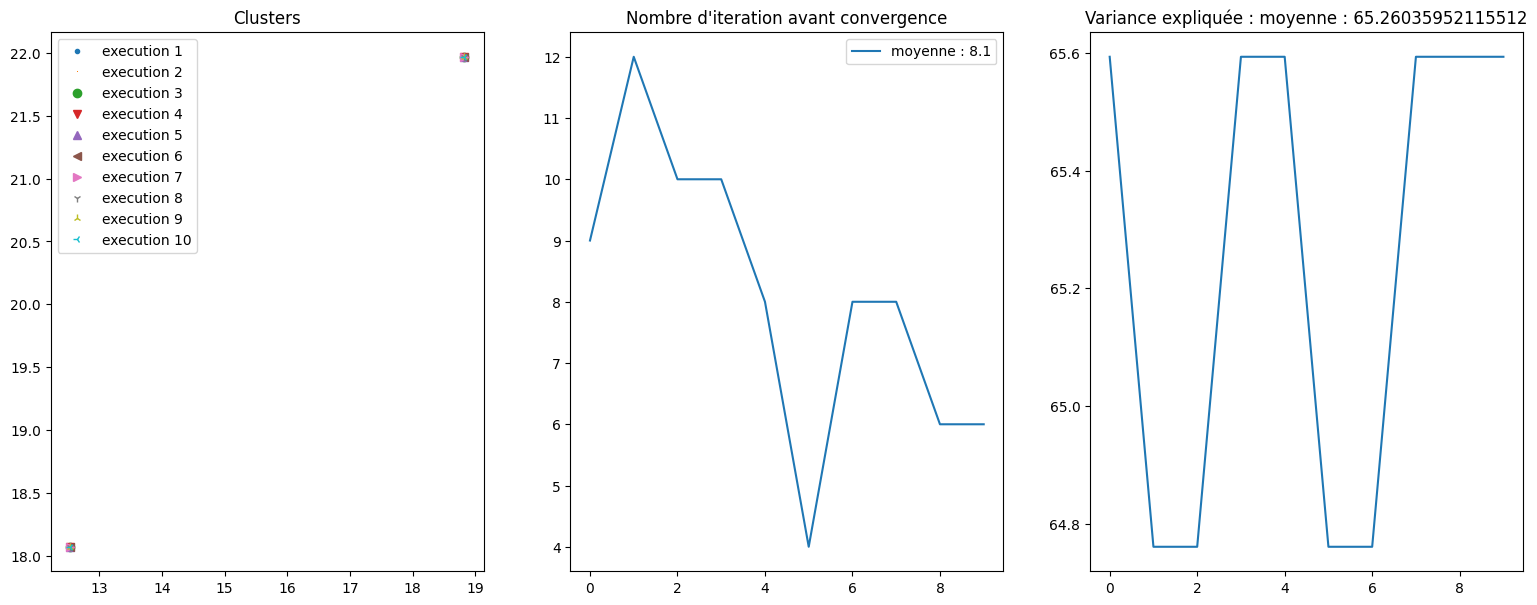

In [17]:
## visualisation de la stablité apres plusiers essais
colors = list(mcolors.TABLEAU_COLORS.values())
markers = [".",",","o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d","|","_",0,1,2,3,4,5,6,7,8,9,10,11]
results = [
    my_kmedoides(X_breath_cancer, 2, Visualisation=False, Seuil=0.001, kpp=False) for _ in range(10)
]

results = [ [result[0], len(result[2]), result[3][-1]] for result in results]



plt.subplots(1, 3, figsize=(19, 7))

plt.subplot(1, 3, 1)
clusters = [result[0] for result in results]

for i, C in enumerate(clusters):
    plt.plot(C[:, 0], C[:, 1], markers[i], color=colors[i], label=f'execution {i+1}')
    plt.title('Clusters')
plt.legend()

plt.subplot(1, 3, 2)
taille = [result[1] for result in results]
plt.plot(taille, label=f'moyenne : {np.mean(taille).round(2)}')
plt.title("Nombre d'iteration avant convergence")
plt.legend()

plt.subplot(1, 3, 3)
mse = [result[2] for result in results]
plt.plot(mse)
plt.title(f'Variance expliquée : moyenne : {np.mean(mse)}')

Text(0.5, 1.0, 'Variance expliquée : moyenne : 65.34365986338153')

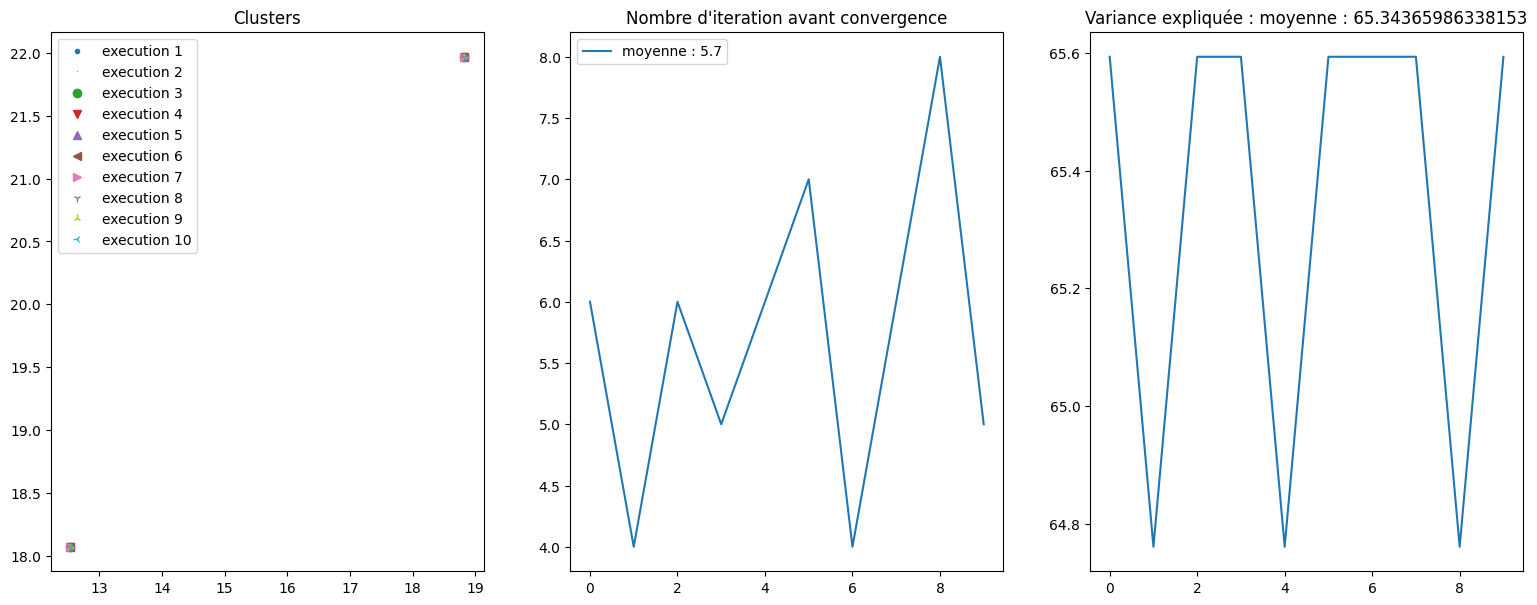

In [18]:
## visualisation de la stablité apres plusiers essais
colors = list(mcolors.TABLEAU_COLORS.values())
markers = [".",",","o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d","|","_",0,1,2,3,4,5,6,7,8,9,10,11]

results = [
    my_kmedoides(X_breath_cancer, 2, Visualisation=False, Seuil=0.001, kpp=True) for _ in range(10)
]

results = [ [result[0], len(result[2]), result[3][-1]] for result in results]

plt.subplots(1, 3, figsize=(19, 7))

plt.subplot(1, 3, 1)
clusters = [result[0] for result in results]

for i, C in enumerate(clusters):
    plt.plot(C[:, 0], C[:, 1], markers[i], color=colors[i], label=f'execution {i+1}')
    plt.title('Clusters')
plt.legend()

plt.subplot(1, 3, 2)
taille = [result[1] for result in results]
plt.plot(taille, label=f'moyenne : {np.mean(taille).round(2)}')
plt.title("Nombre d'iteration avant convergence")
plt.legend()
plt.subplot(1, 3, 3)
mse = [result[2] for result in results]
plt.plot(mse)
plt.title(f'Variance expliquée : moyenne : {np.mean(mse)}')


## impact du nombre de cluster

Iteration : 1
Iteration : 2
Iteration : 3
Iteration : 1
Iteration : 2
Iteration : 3
Iteration : 1
Iteration : 2
Iteration : 3
Iteration : 4
Iteration : 5
Iteration : 6
Iteration : 1
Iteration : 2
Iteration : 3
Iteration : 4
Iteration : 5
Iteration : 1
Iteration : 2
Iteration : 3
Iteration : 4
Iteration : 1
Iteration : 2
Iteration : 3
Iteration : 4
Iteration : 5
Iteration : 1
Iteration : 2
Iteration : 3
Iteration : 4
Iteration : 5


/Users/talibe/Desktop/licence 3 rouen/S5/Data Analysis/TP analyse et visualisation des donnees/M1 SD/TP-2-Clustering etudiant/your_k_medoids.py:62: RuntimeWarning: invalid value encountered in scalar divide
  variance_explained[iteration] = 100*(1-(Iw/It))
/Users/talibe/Desktop/licence 3 rouen/S5/Data Analysis/TP analyse et visualisation des donnees/M1 SD/TP-2-Clustering etudiant/your_k_medoids.py:66: RuntimeWarning: divide by zero encountered in scalar divide
  if abs(J[iteration-1]-J[iteration])/J[iteration-1] < Seuil:


Iteration : 6


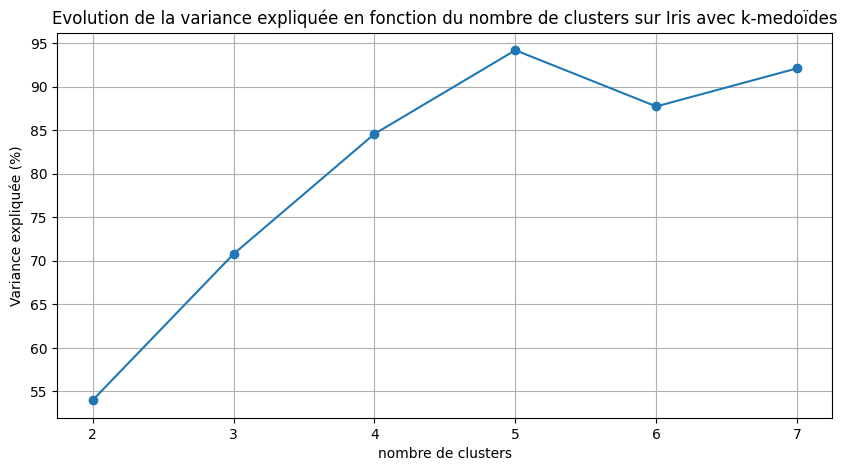

In [18]:
K = np.arange(1, 8)

explained_stds = np.array([my_kmedoides(X_iris, k, Visualisation=False, Seuil=0.001)[3][-1] for k in K])

plt.figure(figsize=(10, 5))
plt.plot(K, explained_stds, 'o-')
plt.xlabel('nombre de clusters')
plt.ylabel('Variance expliquée (%)')
plt.title('Evolution de la variance expliquée en fonction du nombre de clusters sur Iris avec k-medoïdes')
plt.grid()
plt.show()

Iteration : 1


/Users/talibe/Desktop/licence 3 rouen/S5/Data Analysis/TP analyse et visualisation des donnees/M1 SD/TP-2-Clustering etudiant/your_k_medoids.py:62: RuntimeWarning: invalid value encountered in scalar divide
  variance_explained[iteration] = 100*(1-(Iw/It))
/Users/talibe/Desktop/licence 3 rouen/S5/Data Analysis/TP analyse et visualisation des donnees/M1 SD/TP-2-Clustering etudiant/your_k_medoids.py:66: RuntimeWarning: divide by zero encountered in scalar divide
  if abs(J[iteration-1]-J[iteration])/J[iteration-1] < Seuil:


Iteration : 2
Iteration : 3
Iteration : 1
Iteration : 2
Iteration : 3
Iteration : 4
Iteration : 5
Iteration : 6
Iteration : 7
Iteration : 8
Iteration : 1
Iteration : 2
Iteration : 3
Iteration : 4
Iteration : 5
Iteration : 6
Iteration : 1
Iteration : 2
Iteration : 3
Iteration : 4
Iteration : 5
Iteration : 6
Iteration : 7
Iteration : 8
Iteration : 9
Iteration : 10
Iteration : 11
Iteration : 12
Iteration : 1
Iteration : 2
Iteration : 3
Iteration : 4
Iteration : 5
Iteration : 6
Iteration : 1
Iteration : 2
Iteration : 3
Iteration : 4
Iteration : 5
Iteration : 6
Iteration : 7
Iteration : 8
Iteration : 9
Iteration : 1
Iteration : 2
Iteration : 3
Iteration : 4
Iteration : 5
Iteration : 6
Iteration : 7
Iteration : 8
Iteration : 9
Iteration : 10
Iteration : 11


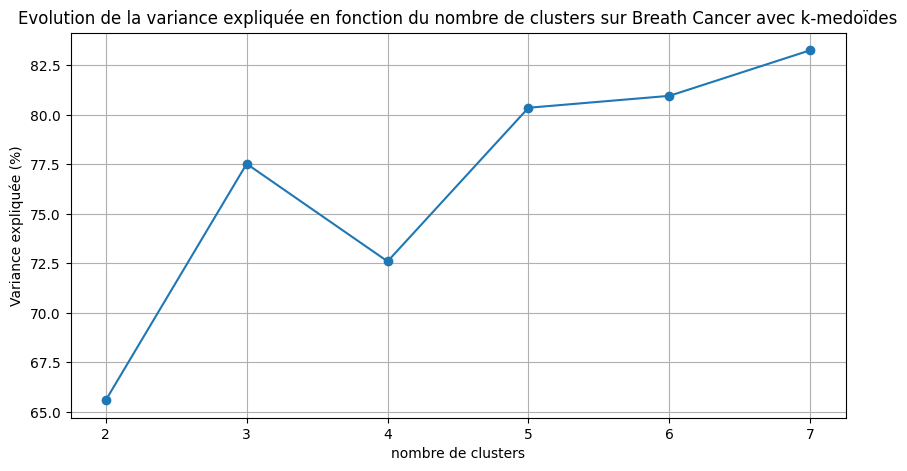

In [19]:
K = np.arange(1, 8)

explained_stds = np.array([my_kmedoides(X_breath_cancer, k, Visualisation=False, Seuil=0.001)[3][-1] for k in K])

plt.figure(figsize=(10, 5))
plt.plot(K, explained_stds, 'o-')
plt.xlabel('nombre de clusters')
plt.ylabel('Variance expliquée (%)')
plt.title('Evolution de la variance expliquée en fonction du nombre de clusters sur Breath Cancer avec k-medoïdes')
plt.grid()
plt.show()

# Comparaison avec scikitlearn

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-p

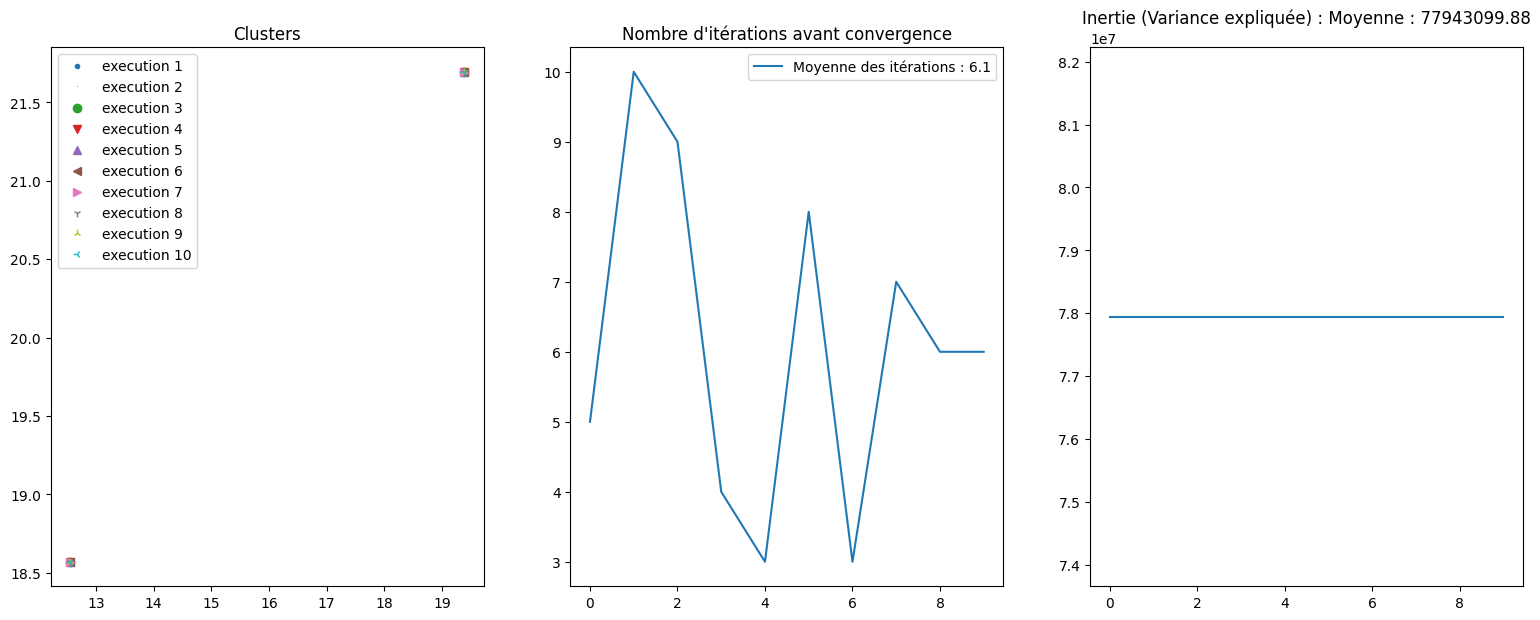

In [27]:
# Importation des bibliothèques nécessaires
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_breast_cancer
import matplotlib.colors as mcolors

# Chargement du jeu de données

# Définition des couleurs et des marqueurs
colors = list(mcolors.TABLEAU_COLORS.values())
markers = [".",",","o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d","|","_",0,1,2,3,4,5,6,7,8,9,10,11]

# Liste pour stocker les résultats des différentes exécutions
results = []

# Exécution de KMedoids plusieurs fois
for _ in range(10):
    kmedoids = KMeans(n_clusters=2, init='k-means++', max_iter=300)
    kmedoids.fit(X_breath_cancer)
    labels = kmedoids.labels_
    centers = kmedoids.cluster_centers_
    n_iter = kmedoids.n_iter_
    inertia = kmedoids.inertia_
    
    # Stockage des clusters, du nombre d'itérations et de la variance expliquée
    results.append([centers, n_iter, inertia])

# Visualisation des résultats

plt.subplots(1, 3, figsize=(19, 7))

# Sous-graphique 1 : Affichage des clusters
plt.subplot(1, 3, 1)
clusters = [result[0] for result in results]

for i, C in enumerate(clusters):
    plt.plot(C[:, 0], C[:, 1], markers[i], color=colors[i], label=f'execution {i+1}')
    plt.title('Clusters')
plt.legend()

# Sous-graphique 2 : Nombre d'itérations avant convergence
plt.subplot(1, 3, 2)
taille = [result[1] for result in results]
plt.plot(taille, label=f'Moyenne des itérations : {np.mean(taille).round(2)}')
plt.title("Nombre d'itérations avant convergence")
plt.legend()

# Sous-graphique 3 : Inertie finale (variance expliquée)
plt.subplot(1, 3, 3)
mse = [result[2] for result in results]
plt.plot(mse)
plt.title(f'Inertie (Variance expliquée) : Moyenne : {np.mean(mse).round(2)}')

plt.show()
